In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from google.cloud import bigquery

### Retrieving Data

In [2]:
client = bigquery.Client()

dataset_ref = client.dataset('world_bank_health_population', project='bigquery-public-data')

dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


### Viewing tables

In [3]:
tables = list(client.list_tables(dataset))

list_of_tables = [table.table_id for table in tables]

print(list_of_tables)

['country_series_definitions', 'country_summary', 'health_nutrition_population', 'series_summary', 'series_times']


In [4]:
table_ref = dataset_ref.table('country_series_definitions')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,country_code,series_code,description
0,AUS,SH.MMR.LEVE,Paid parental leave is available
1,AUS,SH.MMR.WAGE.ZS,Paid parental leave is available
2,AUS,SP.POP.0014.FE.ZS,"Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands."
3,AUS,SP.POP.0014.MA.ZS,"Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands."
4,AUS,SP.POP.0014.TO.ZS,"Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands."


In [5]:
table_ref = dataset_ref.table('country_summary')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,country_code,short_name,table_name,long_name,two_alpha_code,currency_unit,special_notes,region,income_group,wb_2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,ppp_survey_year,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data
0,ARB,Arab World,Arab World,Arab World,1A,None,Arab World aggregate. Arab World is composed of members of the League of Arab States.,None,None,1A,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None
1,CEB,Central Europe and the Baltics,Central Europe and the Baltics,Central Europe and the Baltics,B8,None,Central Europe and the Baltics aggregate.,None,None,B8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None
2,CSS,Caribbean small states,Caribbean small states,Caribbean small states,S3,None,None,None,None,S3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None
3,EAP,East Asia & Pacific (excluding high income),East Asia & Pacific (excluding high income),East Asia & Pacific (excluding high income),4E,None,East Asia and Pacific regional aggregate (does not include high-income economies).,None,None,4E,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None
4,EAR,Early-demographic dividend,Early-demographic dividend,Early-demographic dividend,V2,None,Early-dividend countries are mostly lower-middle-income countries further along the fertility transition. Fertility rates have fallen below four births per woman and the working-age share of the population is likely rising considerably.,None,None,V2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None


In [6]:
table_ref = dataset_ref.table('health_nutrition_population')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Channel Islands,CHI,"Population ages 15-64, total",SP.POP.1564.TO,71467.0,1960
1,Channel Islands,CHI,"Population ages 15-64, total",SP.POP.1564.TO,71951.0,1961
2,Channel Islands,CHI,"Population ages 15-64, total",SP.POP.1564.TO,72685.0,1962
3,Channel Islands,CHI,"Population ages 15-64, total",SP.POP.1564.TO,73419.0,1963
4,Channel Islands,CHI,"Population ages 15-64, total",SP.POP.1564.TO,74038.0,1964


In [7]:
table_ref = dataset_ref.table('series_summary')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,series_code,topic,indicator_name,short_definition,long_definition,unit_of_measure,periodicity,base_period,other_notes,aggregation_method,limitations_and_exceptions,notes_from_original_source,general_comments,source,statistical_concept_and_methodology,development_relevance,related_source_links,other_web_links,related_indicators,license_type
0,SH.PRG.SYPH.ZS,Health: Risk factors,Prevalence of syphilis (% of women attending antenatal care),Percentage of women attending antenatal care seropositive for syphilis,Percentage of women attending antenatal care seropositive for syphilis,None,Annual,None,None,None,None,None,None,World Health Organization's Global Health Observatory Data Repository,None,None,None,None,None,CC BY-4.0
1,SH.STA.PNVC.ZS,Health: Reproductive health,Postnatal care coverage (% mothers),Percentage of women with a postnatal checkup in the first two days after birth,Percentage of women with a postnatal checkup in the first two days after birth,None,Annual,None,None,None,None,None,None,Demographic and Health Surveys,None,None,None,None,None,CC BY-4.0
2,SH.UHC.SRVS.CV.XD,Health: Universal Health Coverage,UHC service coverage index,UHC service coverage index,"Coverage index for essential health services (based on tracer interventions that include reproductive, maternal, newborn and child health, infectious diseases, noncommunicable diseases and service capacity and access). It is presented on a scale of 0 to 100. Values greater than or equal to 80 are presented as 80 as the index does not provide fine resolution at high values.",None,Annual,None,None,Weighted average,None,None,None,"Hogan et al. An index of the coverage of essential health services for monitoring UHC within the SDGs, Lancet Global Health 2017.","Under SDG 3.8.1, four categories were defined RMNCH, infectious diseases, non-communicable diseases and service capacity and access. Each category contains several tracers. The index is constructed from geometric means of the tracer indicators; first, within each of the four categories, and then across the four category-specific means to obtain the final summary index. See Source for details about methodology.","Universal Health Coverage (UHC) is about ensuring that all people can access the health services they need – without facing financial hardship – is key to improving the well-being of a country’s population. UHC is also an investment in human capital and a foundational driver of inclusive and sustainable economic growth and development. UHC is a target associated with the Sustainable Development Goals (target 3.8), and it relates directly to Goal 3 (Ensure healthy lives and promote well-being for all at all ages) and to Goal 1 (End poverty in all its forms everywhere).",None,None,None,CC BY-4.0
3,SP.POP.GROW,Health: Population: Dynamics,Population growth (annual %),"Annual population growth rate. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.","Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.",None,Annual,None,None,Weighted average,None,None,None,"Derived from total population. Population source: (1) United Nations Population Division. World Population Prospects: 2019 Revision, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.","Total population growth rates are calculated on the assumption that rate of growth is constant between two points in time. The growth rate is computed using the exponentia

In [8]:
table_ref = dataset_ref.table('series_times')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,series_code,year,description
0,SP.ADO.TFRT,1962,The data refer to 1960-1965.
1,SP.DYN.TO65.FE.ZS,1962,The data refer to 1960-1965.
2,SP.DYN.TO65.MA.ZS,1962,The data refer to 1960-1965.
3,SP.POP.BRTH.MF,1962,The data refer to 1960-1965.
4,SP.DYN.TO65.MA.ZS,1967,The data refer to 1965-1970.


### Viewing series codes and what they mean 

In [9]:
qseries = '''
     SELECT DISTINCT series_code, topic, indicator_name
     FROM `bigquery-public-data.world_bank_health_population.series_summary`
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
qseries_job = client.query(qseries, job_config=safe_config)

qseries_results = qseries_job.to_dataframe()

qseries_results

,series_code,topic,indicator_name
0,SH.PRG.SYPH.ZS,Health: Risk factors,Prevalence of syphilis (% of women attending antenatal care)
1,SH.STA.PNVC.ZS,Health: Reproductive health,Postnatal care coverage (% mothers)
2,SH.UHC.SRVS.CV.XD,Health: Universal Health Coverage,UHC service coverage index
3,SP.POP.GROW,Health: Population: Dynamics,Population growth (annual %)
4,SM.POP.NETM,Social Protection & Labor: Migration,Net migration
5,SH.STA.OWAD.FE.ZS,Health: Nutrition,"Prevalence of overweight, female (% of female adults)"
6,SH.STA.OWAD.MA.ZS,Health: Nutrition,"Prevalence of overweight, male (% of male adults)"
7,SH.STA.OWAD.ZS,Health: Nutrition,Prevalence of overweight (% of adults)
8,SH.UHC.OOPC.10.TO,Health: Universal Health Coverage,Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure
9,SH.UHC.OOPC.10.ZS,Health: Universal Health Coverage,Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%)


### Solving Questions

Question 1: How has the mortality rate for an adult changed in Canada for a male compared to female?

In [10]:
q1 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SP.DYN.AMRT.MA' AND country_name = 'Canada' OR indicator_code = 'SP.DYN.AMRT.FE' AND country_name = 'Canada'
     ORDER BY year
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q1_job = client.query(q1, job_config=safe_config)

q1_results = q1_job.to_dataframe()

q1_results

,country_name,indicator_name,year,value
0,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1960,109.671
1,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1960,192.876
2,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1961,106.471
3,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1961,190.728
4,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1962,108.087
5,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1962,191.161
6,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1963,106.692
7,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1963,191.753
8,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1964,104.377
9,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1964,191.376


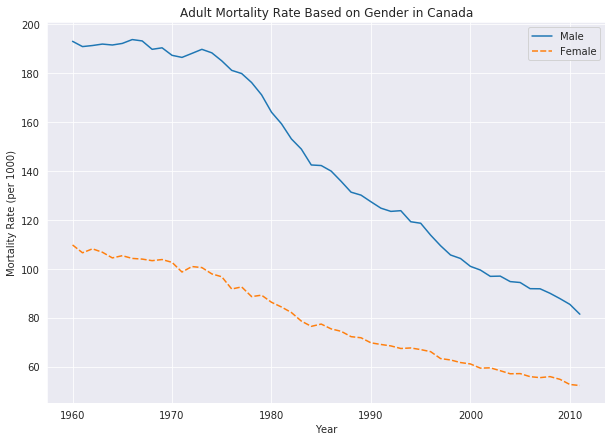

In [11]:
q1 = q1_results[['year', 'value']]

year_lst = []
for x in q1['year']:
    year_lst.append(x)
year_lst = year_lst[0::2]

male_lst = []
for x in q1['value']:
    male_lst.append(x)
male_lst = male_lst[1::2]

female_lst = []
for x in q1['value']:
    female_lst.append(x)
female_lst = female_lst[0::2]

q1_data = {'Year': year_lst,
           'Male': male_lst,
           'Female': female_lst
          }

q1_df = pd.DataFrame(q1_data, columns = ['Year','Male', 'Female'])
q1_df = q1_df.set_index('Year')

plt.figure(figsize=(10,7))
plt.title('Adult Mortality Rate Based on Gender in Canada')
plt.ylabel('Mortality Rate (per 1000)')
sns.lineplot(data=q1_df)

Answer 1: Both male and female adults are expected to live longer in Canada now then in comparrison to 1960!

---------------------------------------------------------------------------------------------------------------------------------------

Question 2: What's the difference in the children population percentage based on income class, and how has it changed?

In [12]:
q2 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SP.POP.0014.TO.ZS' AND country_name = 'High income' 
         OR indicator_code = 'SP.POP.0014.TO.ZS' AND country_name = 'Middle income' 
         OR indicator_code = 'SP.POP.0014.TO.ZS' AND country_name = 'Low income'
     ORDER BY year
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q2_job = client.query(q2, job_config=safe_config)

q2_results = q2_job.to_dataframe()

q2_results

,country_name,indicator_name,year,value
0,High income,Population ages 0-14 (% of total population),1960,28.992027
1,Low income,Population ages 0-14 (% of total population),1960,42.469977
2,Middle income,Population ages 0-14 (% of total population),1960,39.716828
3,High income,Population ages 0-14 (% of total population),1961,28.990119
4,Low income,Population ages 0-14 (% of total population),1961,42.754155
5,Middle income,Population ages 0-14 (% of total population),1961,39.953389
6,High income,Population ages 0-14 (% of total population),1962,28.876401
7,Low income,Population ages 0-14 (% of total population),1962,42.902297
8,Middle income,Population ages 0-14 (% of total population),1962,40.284169
9,High income,Population ages 0-14 (% of total population),1963,28.685733


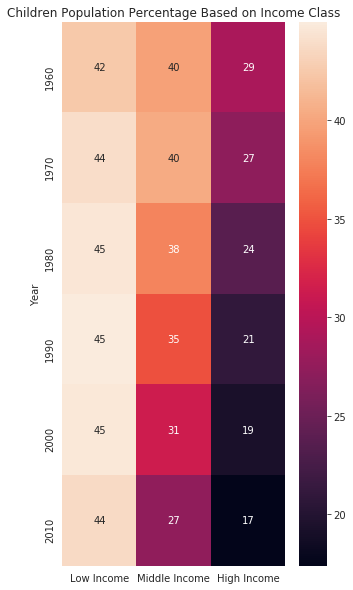

In [13]:
q2 = q2_results[['year', 'value']]

year_lst = []
for x in q2['year']:
    year_lst.append(x)
year_lst = year_lst[0::3]

high_income_lst = []
for x in q2['value']:
    high_income_lst.append(x)
high_income_lst = high_income_lst[0::3]

low_income_lst = []
for x in q2['value']:
    low_income_lst.append(x)
low_income_lst = low_income_lst[1::3]

middle_income_lst = []
for x in q2['value']:
    middle_income_lst.append(x)
middle_income_lst = middle_income_lst[2::3]

q2_data = {'Year': year_lst,
           'Low Income': low_income_lst,
           'Middle Income': middle_income_lst,
           'High Income': high_income_lst
          }

q2_df = pd.DataFrame(q2_data, columns=['Year', 'Low Income', 'Middle Income', 'High Income'])
q2_df = q2_df.set_index('Year')
q2_df = q2_df.iloc[0::10]
q2_df

plt.figure(figsize=(5,10))
plt.title('Children Population Percentage Based on Income Class')
sns.heatmap(data=q2_df, annot=True)

Answer 2: High income has the lowest children population percentage at 17, followed by middle income at 27 percent, and then low income with the highest percentage of children at 44. Since 1960 low-income children's percentage has slightly increased, where middle and high-income children's percentage has decreased by more than 10 percent respectively.

------------------------------------------------------------------------------------------------------------------------------------------

Question 3: How has the Canadian population overweight percentage changed when comparing males and females?

In [14]:
q3 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SH.STA.OWAD.FE.ZS' AND country_name = 'Canada' 
         OR indicator_code = 'SH.STA.OWAD.MA.ZS' AND country_name = 'Canada'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q3_job = client.query(q3, job_config=safe_config)

q3_results = q3_job.to_dataframe()

q3_results

,country_name,indicator_name,year,value
0,Canada,"Prevalence of overweight, female (% of female adults)",1975,35.5
1,Canada,"Prevalence of overweight, female (% of female adults)",1976,36.0
2,Canada,"Prevalence of overweight, female (% of female adults)",1977,36.5
3,Canada,"Prevalence of overweight, female (% of female adults)",1978,36.9
4,Canada,"Prevalence of overweight, female (% of female adults)",1979,37.4
5,Canada,"Prevalence of overweight, female (% of female adults)",1980,37.9
6,Canada,"Prevalence of overweight, female (% of female adults)",1981,38.4
7,Canada,"Prevalence of overweight, female (% of female adults)",1982,39.0
8,Canada,"Prevalence of overweight, female (% of female adults)",1983,39.5
9,Canada,"Prevalence of overweight, female (% of female adults)",1984,40.1


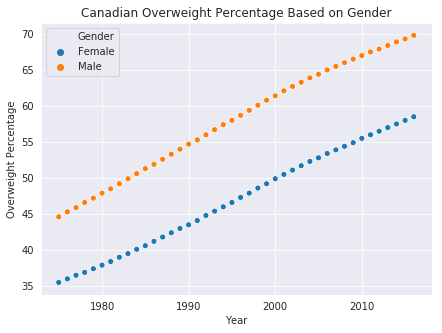

In [15]:
gender = []

for x in range(0,42):
    x = 'Female'
    gender.append(x)
for y in range(0,42):
    y ='Male'
    gender.append(y)

q3_results['Gender'] = gender

q3 = q3_results[['year', 'value', 'Gender']]
q3.columns = ['Year', 'Overweight Percentage', 'Gender']


plt.figure(figsize=(7,5))
plt.title('Canadian Overweight Percentage Based on Gender')
sns.scatterplot(x='Year', y='Overweight Percentage', hue='Gender', data=q3)

Answer 3: Both the males and females' overweight percentage has increased from 1975 to 2016. In 1975 females' overweight percentage was 35.5 and males were 44.6, in 2016 females' overweight percentage was 58.5 and males were 69.8 an increase in over 20 percent respectively.

-------------------------------------------------------------------------------------------------------------------------------------------

Question 4: What's the distibrution of rural population in terms of income class and how has it changed over the years?

In [16]:
q4 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SP.RUR.TOTL' AND country_name = 'High income'
         OR indicator_code = 'SP.RUR.TOTL' AND country_name = 'Middle income'
         OR indicator_code = 'SP.RUR.TOTL' AND country_name = 'Low income'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q4_job = client.query(q4, job_config=safe_config)

q4_results = q4_job.to_dataframe()

q4_results

,country_name,indicator_name,year,value
0,High income,Rural population,1960,2.774197e+08
1,High income,Rural population,1961,2.777799e+08
2,High income,Rural population,1962,2.775284e+08
3,High income,Rural population,1963,2.770143e+08
4,High income,Rural population,1964,2.763696e+08
5,High income,Rural population,1965,2.755109e+08
6,High income,Rural population,1966,2.744297e+08
7,High income,Rural population,1967,2.728766e+08
8,High income,Rural population,1968,2.711571e+08
9,High income,Rural population,1969,2.701779e+08


Yearly Rural Population Based on High Income Level


Text(336.9714285714286, 0.5, 'High Income Rural Population')

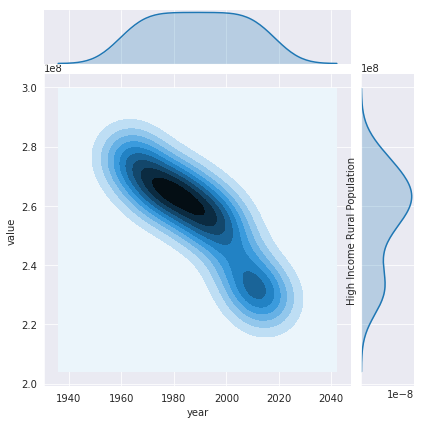

In [17]:
q4_hi = q4_results.iloc[0:59]
q4_li = q4_results[59:118]
q4_mi = q4_results[118:177]

print('Yearly Rural Population Based on High Income Level')

sns.jointplot(x=q4_hi['year'], y=q4_hi['value'], kind="kde")
plt.ylabel('High Income Rural Population')

Yearly Rural Population Based on Middle Income Level


Text(336.9714285714286, 0.5, 'Middle Income Rural Population')

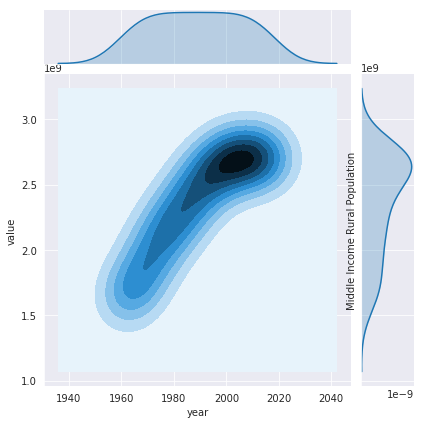

In [18]:
print('Yearly Rural Population Based on Middle Income Level')

sns.jointplot(x=q4_mi['year'], y=q4_mi['value'], kind="kde")
plt.ylabel('Middle Income Rural Population')

Yearly Rural Population Based on Low Income Level


Text(336.9714285714286, 0.5, 'Low Income Rural Population')

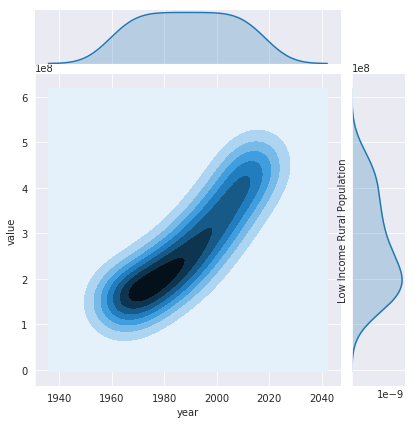

In [19]:
print('Yearly Rural Population Based on Low Income Level')

sns.jointplot(x=q4_li['year'], y=q4_li['value'], kind="kde")
plt.ylabel('Low Income Rural Population')

Text(0.5, 0, 'Population')

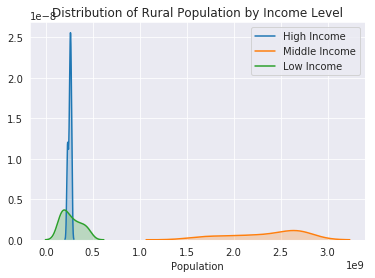

In [20]:
sns.kdeplot(data=q4_hi['value'], label='High Income', shade=True)
sns.kdeplot(data=q4_mi['value'], label='Middle Income', shade=True)
sns.kdeplot(data=q4_li['value'], label= 'Low Income', shade=True)

plt.title("Distribution of Rural Population by Income Level")
plt.xlabel('Population')

Answer 4: Through these four plots, we can see that both low and middle-income populations are growing in rural areas whereas high income is decreasing. In the last graph, we can see that middle income has a much larger population currently living in a rural area, lower and high income has a much smaller population living in rural but the lower-income is more distributed throughout the years.

------------------------------------------------------------------------------------------------------------------------------------------------

Question 5: What has the North American country's unemployment percentage of total labor force mostly been since 1991?

In [21]:
q5 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SL.UEM.TOTL.ZS' AND country_name = 'Canada'
         OR indicator_code = 'SL.UEM.TOTL.ZS' AND country_name = 'United States'
         OR indicator_code = 'SL.UEM.TOTL.ZS' AND country_name = 'Mexico'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q5_job = client.query(q5, job_config=safe_config)

q5_results = q5_job.to_dataframe()

q5_results

,country_name,indicator_name,year,value
0,Mexico,"Unemployment, total (% of total labor force)",1991,3.047
1,Mexico,"Unemployment, total (% of total labor force)",1992,3.096
2,Mexico,"Unemployment, total (% of total labor force)",1993,3.214
3,Mexico,"Unemployment, total (% of total labor force)",1994,4.248
4,Mexico,"Unemployment, total (% of total labor force)",1995,6.888
5,Mexico,"Unemployment, total (% of total labor force)",1996,5.250
6,Mexico,"Unemployment, total (% of total labor force)",1997,4.055
7,Mexico,"Unemployment, total (% of total labor force)",1998,3.573
8,Mexico,"Unemployment, total (% of total labor force)",1999,2.488
9,Mexico,"Unemployment, total (% of total labor force)",2000,2.563


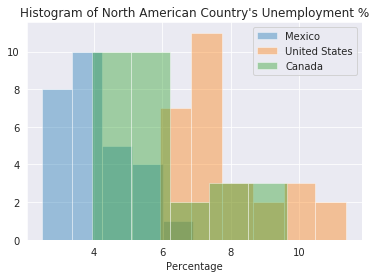

In [22]:
q5_mexico = q5_results.iloc[0:28]
q5_usa = q5_results.iloc[28:56]
q5_canada = q5_results.iloc[56:84]

sns.distplot(a=q5_mexico['value'], label='Mexico', kde=False)
sns.distplot(a=q5_usa['value'], label='United States', kde=False)
sns.distplot(a=q5_canada['value'], label='Canada', kde=False)

plt.title("Histogram of North American Country's Unemployment %")
plt.xlabel('Percentage')
plt.legend()

Answer 5: We can see from the histogram that since 1991 Canada's unemployment percentage has mostly been between 6 and 8, the United States has mostly been between 4 and 6, and Mexicos has been between 3 and 4 percent.

------------------------------------------------------------------------------------------------------------------------------------------------

Question 6: Has smoking prevalence had an impact on life expectancy for males and females?

In [23]:
q6 = '''
     WITH smoking AS
     (
         SELECT year, value AS smoking_prevalence
         FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
         WHERE indicator_code = 'SH.PRV.SMOK' AND country_name = 'Canada'
     )
     SELECT le.country_name, le.indicator_code, le.year, le.value AS life_expectancy, smoking.smoking_prevalence,
     CASE
         WHEN le.indicator_code = 'SP.DYN.LE00.FE.IN' THEN 'Female'
         ELSE 'Male'
     END AS gender
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` AS le
     RIGHT JOIN smoking
     ON le.year = smoking.year
     WHERE indicator_code = 'SP.DYN.LE00.MA.IN' AND country_name = 'Canada'
         OR indicator_code = 'SP.DYN.LE00.FE.IN' AND country_name = 'Canada'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q6_job = client.query(q6, job_config=safe_config)

q6_results = q6_job.to_dataframe()

q6_results

,country_name,indicator_code,year,life_expectancy,smoking_prevalence,gender
0,Canada,SP.DYN.LE00.FE.IN,2000,81.800,28.2,Female
1,Canada,SP.DYN.LE00.FE.IN,2005,82.600,22.8,Female
2,Canada,SP.DYN.LE00.FE.IN,2010,83.500,18.4,Female
3,Canada,SP.DYN.LE00.FE.IN,2011,83.600,17.6,Female
4,Canada,SP.DYN.LE00.FE.IN,2012,83.800,16.9,Female
5,Canada,SP.DYN.LE00.FE.IN,2013,83.900,16.3,Female
6,Canada,SP.DYN.LE00.FE.IN,2014,83.900,15.6,Female
7,Canada,SP.DYN.LE00.FE.IN,2015,84.000,15.0,Female
8,Canada,SP.DYN.LE00.FE.IN,2016,84.232,14.3,Female
9,Canada,SP.DYN.LE00.MA.IN,2000,76.600,28.2,Male


Text(32.54074001736112, 0.5, 'Smoking Prevalence')

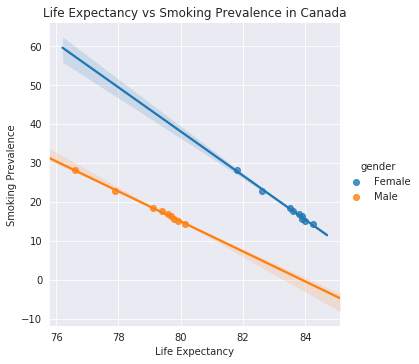

In [24]:
sns.lmplot(x="life_expectancy", y="smoking_prevalence", hue="gender", data=q6_results)
plt.title('Life Expectancy vs Smoking Prevalence in Canada')
plt.xlabel('Life Expectancy')
plt.ylabel('Smoking Prevalence')

In [25]:
q6_1 = '''
        SELECT country_name, indicator_code, year, value AS life_expectancy,
        CASE
            WHEN le.indicator_code = 'SP.DYN.LE00.FE.IN' THEN 'Female'
            ELSE 'Male'
        END AS gender
        FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` AS le
        WHERE indicator_code = 'SP.DYN.LE00.MA.IN' AND country_name = 'Canada'
            OR indicator_code = 'SP.DYN.LE00.FE.IN' AND country_name = 'Canada'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q6_1_job = client.query(q6_1, job_config=safe_config)

q6_1_results = q6_1_job.to_dataframe()

q6_1_results

,country_name,indicator_code,year,life_expectancy,gender
0,Canada,SP.DYN.LE00.FE.IN,1960,74.150,Female
1,Canada,SP.DYN.LE00.FE.IN,1961,74.450,Female
2,Canada,SP.DYN.LE00.FE.IN,1962,74.430,Female
3,Canada,SP.DYN.LE00.FE.IN,1963,74.500,Female
4,Canada,SP.DYN.LE00.FE.IN,1964,75.080,Female
5,Canada,SP.DYN.LE00.FE.IN,1965,75.140,Female
6,Canada,SP.DYN.LE00.FE.IN,1966,75.390,Female
7,Canada,SP.DYN.LE00.FE.IN,1967,75.660,Female
8,Canada,SP.DYN.LE00.FE.IN,1968,75.780,Female
9,Canada,SP.DYN.LE00.FE.IN,1969,76.010,Female


Text(0, 0.5, 'Life Expectancy')

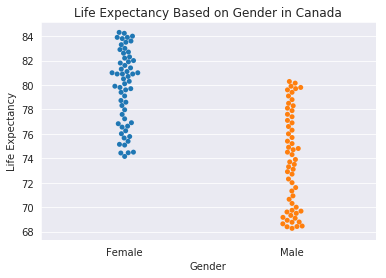

In [26]:
sns.swarmplot(x= q6_1_results['gender'], y=q6_1_results['life_expectancy'])
plt.title('Life Expectancy Based on Gender in Canada')
plt.xlabel('Gender')
plt.ylabel('Life Expectancy')

Answer 6: The lower smoking prevalence is the higher life expectancy becomes for both male and female. Also, in general females tend to have a longer life expectancy than males.

-----------------------------------------------------------------

Question 7: Create an XGBoost machine learning model that predicts the population growth of Canada for 2019.

In [27]:
q7 = '''
     SELECT * 
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SP.POP.GROW' and country_name = 'Canada'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q7_job = client.query(q7, job_config=safe_config)

q7_results = q7_job.to_dataframe()

q7_results

,country_name,country_code,indicator_name,indicator_code,value,year
0,Canada,CAN,Population growth (annual %),SP.POP.GROW,2.298627,1960
1,Canada,CAN,Population growth (annual %),SP.POP.GROW,2.001122,1961
2,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.859888,1962
3,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.862846,1963
4,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.885715,1964
5,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.810167,1965
6,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.862814,1966
7,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.799357,1967
8,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.613409,1968
9,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.359783,1969


[21:52:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1.4078954458236694]


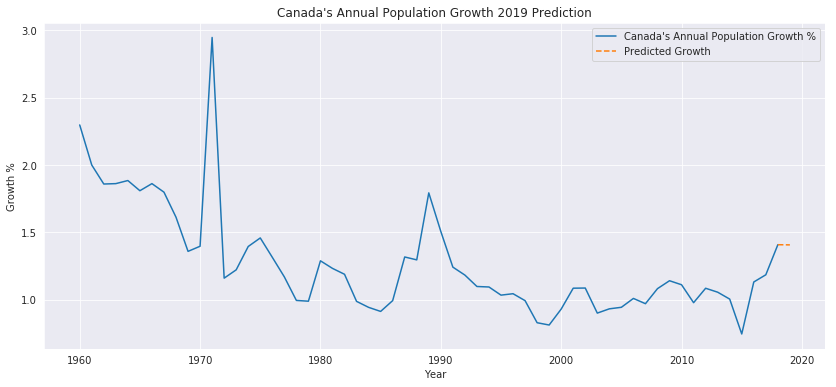

In [28]:
from xgboost import XGBRegressor

x = q7_results.year
y = q7_results.value

x_lst = []
for num in x:
    num = [num]
    x_lst.append(num)

y_lst = []
for num in y:
    num = [num]
    y_lst.append(num)

x_array = np.array(x_lst)
y_array = np.array(y_lst)

model = XGBRegressor(n_estimators = 500)
model.fit(x_array, y_array)

prediction = model.predict(np.array([[2019]]))
prediction = prediction.tolist()

plot_data = q7_results[['year', 'value']]
plot_prediction = plot_data.iloc[-1:]
plot_prediction = plot_prediction.append({'year': 2019, 'value':prediction[0]}, ignore_index = True)

plot_data = plot_data.set_index('year')
plot_prediction = plot_prediction.set_index('year')

plt.figure(figsize=(14,6))

plt.title("Canada's Annual Population Growth 2019 Prediction")
sns.lineplot(data=plot_data['value'], label="Canada's Annual Population Growth %")
ax = sns.lineplot(data=plot_prediction['value'], label="Predicted Growth")
ax.lines[1].set_linestyle("--")
plt.xlabel("Year")
plt.ylabel('Growth %')
leg = ax.legend()
leg_lines = leg.get_lines()

print(prediction)

Answer 7: According to the created XGBoost model, Canada's population is predicted to grow by 1.4078% in 2019.

--------------------------------------------